In [ ]:
import pandas as pd
import sns as sns
from matplotlib import pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [15]:
df = pd.read_csv('../data/adult.csv')
df = df[~df.isin(['?']).any(axis=1)]
incorrect_rows = df[df.apply(lambda row: row['salary'] != '>50K' if row['salary K$'] > 50 else row['salary'] != '<=50K', axis=1)]
print(incorrect_rows)

Empty DataFrame
Columns: [Unnamed: 0, age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, salary, salary K$]
Index: []


# Task 1
Print the count of men and women in the dataset.

In [16]:
gender_counts = df['sex'].value_counts()
print(gender_counts)

sex
Male      20380
Female     9782
Name: count, dtype: int64


# Task 2
Find the average age of men in dataset

In [17]:
average_age_men = df[df['sex'] == 'Male']['age'].mean()
print("Average age of men:", average_age_men)

Average age of men: 39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [18]:
poland_percentage = (df[df['native-country'] == 'Poland'].shape[0] / df.shape[0]) * 100
print("Percentage of people from Poland: {:.2f}%".format(poland_percentage))

Percentage of people from Poland: 0.19%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [47]:
high_income_mean = df[df['salary'] == '>50K']["age"].mean()
high_income_std = df[df['salary'] == '>50K']["age"].std()
low_income_mean = df[df['salary'] != '>50K']["age"].mean()
low_income_std = df[df['salary'] != '>50K']["age"].std()
print("Mean age for people earning > 50K:", high_income_mean)
print("Standard deviation of age for people earning > 50K:", high_income_std)
print("Mean age for people earning <= 50K:", low_income_mean)
print("Standard deviation of age for people earning <= 50K:", low_income_std)

Mean age for people earning > 50K: 43.95911028236548
Standard deviation of age for people earning > 50K: 10.269632835673852
Mean age for people earning <= 50K: 36.60806038668668
Standard deviation of age for people earning <= 50K: 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [59]:
without_higher_education = df[(df['salary'] == '>50K') & (~df['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']))]
if len(without_higher_education) > 0:
    print("There are people with >50K salary but without higher education:")
    print(without_higher_education)
else:
    print("There are no people with >50K salary and without higher education.")

There are people with >50K salary but without higher education:
       Unnamed: 0  age         workclass     education      marital-status  \
7               7   52  Self-emp-not-inc       HS-grad  Married-civ-spouse   
10             10   37           Private  Some-college  Married-civ-spouse   
55             55   43           Private  Some-college  Married-civ-spouse   
67             67   53           Private       HS-grad  Married-civ-spouse   
68             68   49      Self-emp-inc  Some-college  Married-civ-spouse   
...           ...  ...               ...           ...                 ...   
32462       32462   48      Self-emp-inc       HS-grad  Married-civ-spouse   
32518       32518   57         Local-gov       HS-grad  Married-civ-spouse   
32519       32519   46           Private  Some-college  Married-civ-spouse   
32557       32557   40           Private       HS-grad  Married-civ-spouse   
32560       32560   52      Self-emp-inc       HS-grad  Married-civ-spouse   


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [57]:
education_stats = df.groupby('education')['age'].describe()
print(education_stats)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [58]:
married_men = df[(df['sex'] == 'Male') & (df['marital-status'].str.startswith('Married'))]
unmarried_men = df[(df['sex'] == 'Male') & (~df['marital-status'].str.startswith('Married'))]

married_men_salary = married_men['salary'].value_counts()
unmarried_men_salary = unmarried_men['salary'].value_counts()

print("Salary distribution for married men:")
print(married_men_salary)
print()

print("Salary distribution for non-married men:")
print(unmarried_men_salary)

Salary distribution for married men:
salary
<=50K    7052
>50K     5723
Name: count, dtype: int64

Salary distribution for non-married men:
salary
<=50K    6932
>50K      673
Name: count, dtype: int64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [60]:
max_hours_per_week = df['hours-per-week'].max()
people_with_max_hours = df[df['hours-per-week'] == max_hours_per_week].shape[0]

print("Maximum hours per week:", max_hours_per_week)
print("Number of people who work the same amount of hours per week:", people_with_max_hours)

Maximum hours per week: 99
Number of people who work the same amount of hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight their connection.

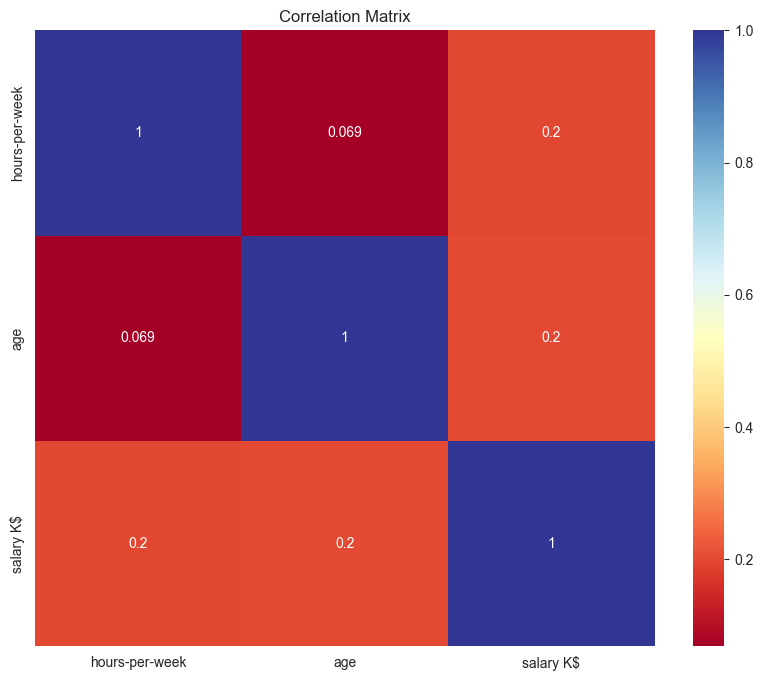

In [14]:
numerical_columns = df[['hours-per-week', 'age', 'salary K$']]

correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Matrix")
plt.show()